In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
data = pd.read_csv('AB_NYC_2019.csv')

In [2]:
target = data[
    (data.neighbourhood_group == 'Manhattan') &
    (data.price < data.price.quantile(.2)) &
    (data.minimum_nights < 3) &
    (data.number_of_reviews > data.number_of_reviews.mean()) &
    (data.room_type == 'Private room') &
    (data.availability_365 > 300)
]

In [3]:
G = ox.graph_from_place('Manhattan, New York, USA', network_type='walk')

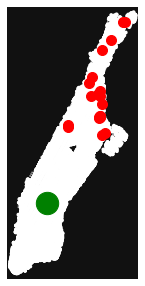

In [4]:
lat_target = target.latitude # массив координат отелей
lng_target = target.longitude
lat_ESB = 40.748817 # координаты Эмпайр-стейт-билдинг
lng_ESB = -73.985428
fig, ax = ox.plot_graph(G, figsize=(5,5), close=False, show=False)
ax.scatter(lng_target, lat_target, c='red', s=100) # точки отелей
ax.scatter(lng_ESB, lat_ESB, c='green', s=500) # точка Эмпайр-стейт-билдинг

In [5]:
nearest_edges = ox.get_nearest_edges(G, lng_target, lat_target)
nearest_edge_ESB = ox.get_nearest_edge(G, (lat_ESB, lng_ESB))

/opt/conda/lib/python3.9/site-packages/osmnx/distance.py:455: UserWarning: The `get_nearest_edges` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))
/opt/conda/lib/python3.9/site-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dists = geoms.iloc[list(rtree.nearest(xy))].distance(Point(xy))
/opt/conda/lib/python3.9/site-packages/osmnx/distance.py:288: UserWarning: Geometry is in a geographic CRS. Results from 'dista

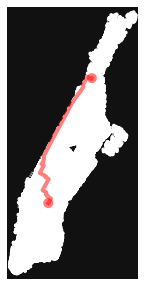

In [6]:
route = nx.shortest_path(G, nearest_edge_ESB[0], nearest_edges[0][0])
fig, ax = ox.plot_graph_route(G, route, figsize=(5,5))

In [7]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [9]:
route_times = sum(ox.utils_graph.get_route_edge_attributes(G, route, 'travel_time'))
print('Затраченное время = %.0f секунд или %.0f минут' % (route_times, route_times/60))

Затраченное время = 1156 секунд или 19 минут
